In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fit

In [99]:
#1.1
df = pd.read_csv("GlobalLandTemperaturesByState.csv")

df = df[['dt', 'AverageTemperature', 'State']]

df['dt'] = pd.to_datetime(df['dt'])
df = df[df['dt'].dt.year > 2000]

states = ['Wyoming', 'Nebraska', 'South Dakota']
df = df[df['State'].isin(states)]

print(df.shape)


#1.2
avg_df = df.groupby('dt')['AverageTemperature'].mean().reset_index()
avg_df.columns = ['date', 'avg_temp']
print(avg_df.head())



#1.3
plt.plot(avg_df['date'], avg_df['avg_temp'])
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Temperature in the 3 States")
plt.show()



#1.4
avg_df['numeric_date'] = avg_df['date'].dt.year + avg_df['date'].dt.month / 12



#1.5
def model(x, A, P, phi, B):
    return A * np.cos(2 * np.pi * x / P + phi) + B

x = avg_df['numeric_date'].values
y = avg_df['avg_temp'].values



#1.6
params, cov = curve_fit(model, x, y, p0=guess)

print("Fitted Parameters:", params)



#1.7
y_fit = model(x, *params)

plt.plot(avg_df['date'], y, label='Data')
plt.plot(avg_df['date'], y_fit, label='Fitted Curve', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Avg Temperature (°C)")
plt.title("Curve Fit to Temperature Data")
plt.legend()
plt.show()



#1.8
errors = np.sqrt(np.diag(cov))
for i in range(len(params)):
    print(f"Param {i+1}: {params[i]:.2f} ± {errors[i]:.2f}")


#1.9
A, P, phi, B = params
print(f"Final Equation:")
print(f"T(t) = {A:.2f} * cos(2π * t / {P:.2f} + {phi:.2f}) + {B:.2f}")


(459, 3)
        date   avg_temp
0 2001-01-01  -4.480333
1 2001-02-01  -7.541000
2 2001-03-01   0.590333
3 2001-04-01   7.889000
4 2001-05-01  13.908667


Fitted Parameters: [-13.88352531   1.00001367  -0.41983524   8.12781563]


Param 1: -13.88 ± 0.23
Param 2: 1.00 ± 0.00
Param 3: -0.42 ± 9.02
Param 4: 8.13 ± 0.16
Final Equation:
T(t) = -13.88 * cos(2π * t / 1.00 + -0.42) + 8.13


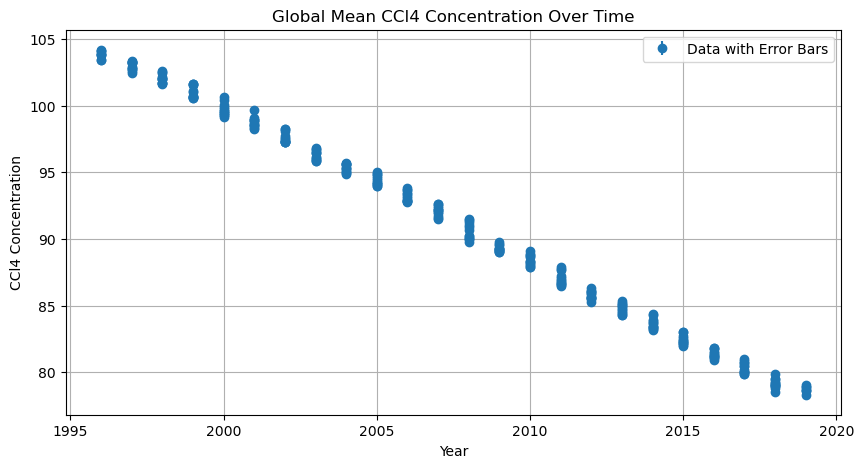

Slope (m): -1.151972 ± 0.001280
Intercept (b): 2403.790148 ± 2.569635
Final Equation: y = -1.151972x + 2403.790148
Reduced Chi-Squared: 13.19


In [147]:
#1.10
from astropy.table import Table

table = Table.read('global_CCl4_MM.dat', format ='ascii')


df = table.to_pandas()

df = df[['CCl4ottoyr', 'CCl4ottoGLm', 'CCl4ottoGLsd']]

df.columns = ['date', 'mean_concentration', 'sd_concentration']

df = df.dropna() #used to make sure that the nan values are not included within the arrays



plt.figure(figsize=(10, 5))
plt.errorbar(df['date'], df['mean_concentration'], yerr=df['sd_concentration'],
             fmt='o', label='Data with Error Bars')

plt.xlabel('Year')
plt.ylabel('CCl4 Concentration')
plt.title('Global Mean CCl4 Concentration Over Time')
plt.grid(True)
plt.legend()
plt.show()



def linear_model(x, m, b):
    return m * x + b

x_data = df['date']
y_data = df['mean_concentration']
y_err = df['sd_concentration']

popt, pcov = curve_fit(linear_model, x_data, y_data, sigma=y_err, absolute_sigma=True)

m, b = popt



residuals = y_data - linear_model(x_data, *popt)

chi_squared = np.sum((residuals / y_err) ** 2)

dof = len(x_data) - len(popt)

reduced_chi_squared = chi_squared / dof


m_err, b_err = np.sqrt(np.diag(pcov))

print(f"Slope (m): {m:.6f} ± {m_err:.6f}")
print(f"Intercept (b): {b:.6f} ± {b_err:.6f}")
print(f"Final Equation: y = {m:.6f}x + {b:.6f}")
print(f"Reduced Chi-Squared: {reduced_chi_squared:.2f}")
